In [ ]:
import matplotlib.pyplot as plt 
import numpy as np 
import torch 
from fitter.auxiliary_functions import histogramer2d
from fitter.fitter import fit_gn_to_data
from point_transformations.GowerSt_map_maker import GowerStConvergenceIA
from point_transformations.transforms import degrade_karmmalike 
from fitter.Gn import Gn

mock_id = 44 
N_bins  = 4  

GS        = GowerStConvergenceIA(int(mock_id))
cosmo     = GS.cosmo_pars
kappa_hr  = GS.get_kappa_map()
kappa_map = np.array([degrade_karmmalike(torch.tensor(kappa_hr[k])) for k in range(N_bins)]) 

/home/ivanespinoza/Extended-Lognormal/point_transformations/GowerSt_map_maker.py:116: IntegrationWarning: The occurrence of roundoff error is detected, which prevents 
  the requested tolerance from being achieved.  The error may be 
  underestimated.
  weight = quad(kernel_interp, self.chi_boundaries[i], self.chi_boundaries[i+1])[0]
/home/ivanespinoza/Extended-Lognormal/point_transformations/GowerSt_map_maker.py:116: IntegrationWarning: The maximum number of subdivisions (50) has been achieved.
  If increasing the limit yields no improvement it is advised to analyze 
  the integrand in order to determine the difficulties.  If the position of a 
  local difficulty can be determined (singularity, discontinuity) one will 
  probably gain from splitting up the interval and calling the integrator 
  on the subranges.  Perhaps a special-purpose integrator should be used.
  weight = quad(kernel_interp, self.chi_boundaries[i], self.chi_boundaries[i+1])[0]


In [ ]:
Zbin = 3
N = '3'
unit_var_samps,x,y = histogramer2d(kappa_map[Zbin],1000,(-10,4.5))
result = fit_gn_to_data(x, y, N)  # Will auto-initialize smartly
fitted_params = result.x
print(fitted_params)

y_bf = Gn(x,N,fitted_params)

bf_samps = Gn(unit_var_samps,N,fitted_params)

Smart initialization for G3: [ 0.1         0.00296557 -0.00020044]
[  0.81616992   2.36401492 543.7405496 ]


Smart initialization for G2: [0.1        0.00463274]
Zbin 0, G2: [0.65791385 0.0028792 ]
Smart initialization for G3: [ 0.1         0.00080735 -0.00012855]
Zbin 0, G3: [9.05314439e-01 7.49930067e-01 8.89553615e+02]
Smart initialization for G2: [0.1        0.00650821]
Zbin 1, G2: [0.49005386 0.00711056]
Smart initialization for G3: [ 0.1         0.00150144 -0.00017185]
Zbin 1, G3: [  0.87240953   1.22248751 662.21535495]
Smart initialization for G2: [0.1        0.00841194]
Zbin 2, G2: [0.34782248 0.01574801]
Smart initialization for G3: [ 0.1         0.00240827 -0.00019952]
Zbin 2, G3: [  0.82200938   1.75456366 534.46382875]
Smart initialization for G2: [0.1        0.00947735]
Zbin 3, G2: [0.28135138 0.02364216]
Smart initialization for G3: [ 0.1         0.00296557 -0.00020044]
Zbin 3, G3: [  0.81616992   2.36401492 543.7405496 ]


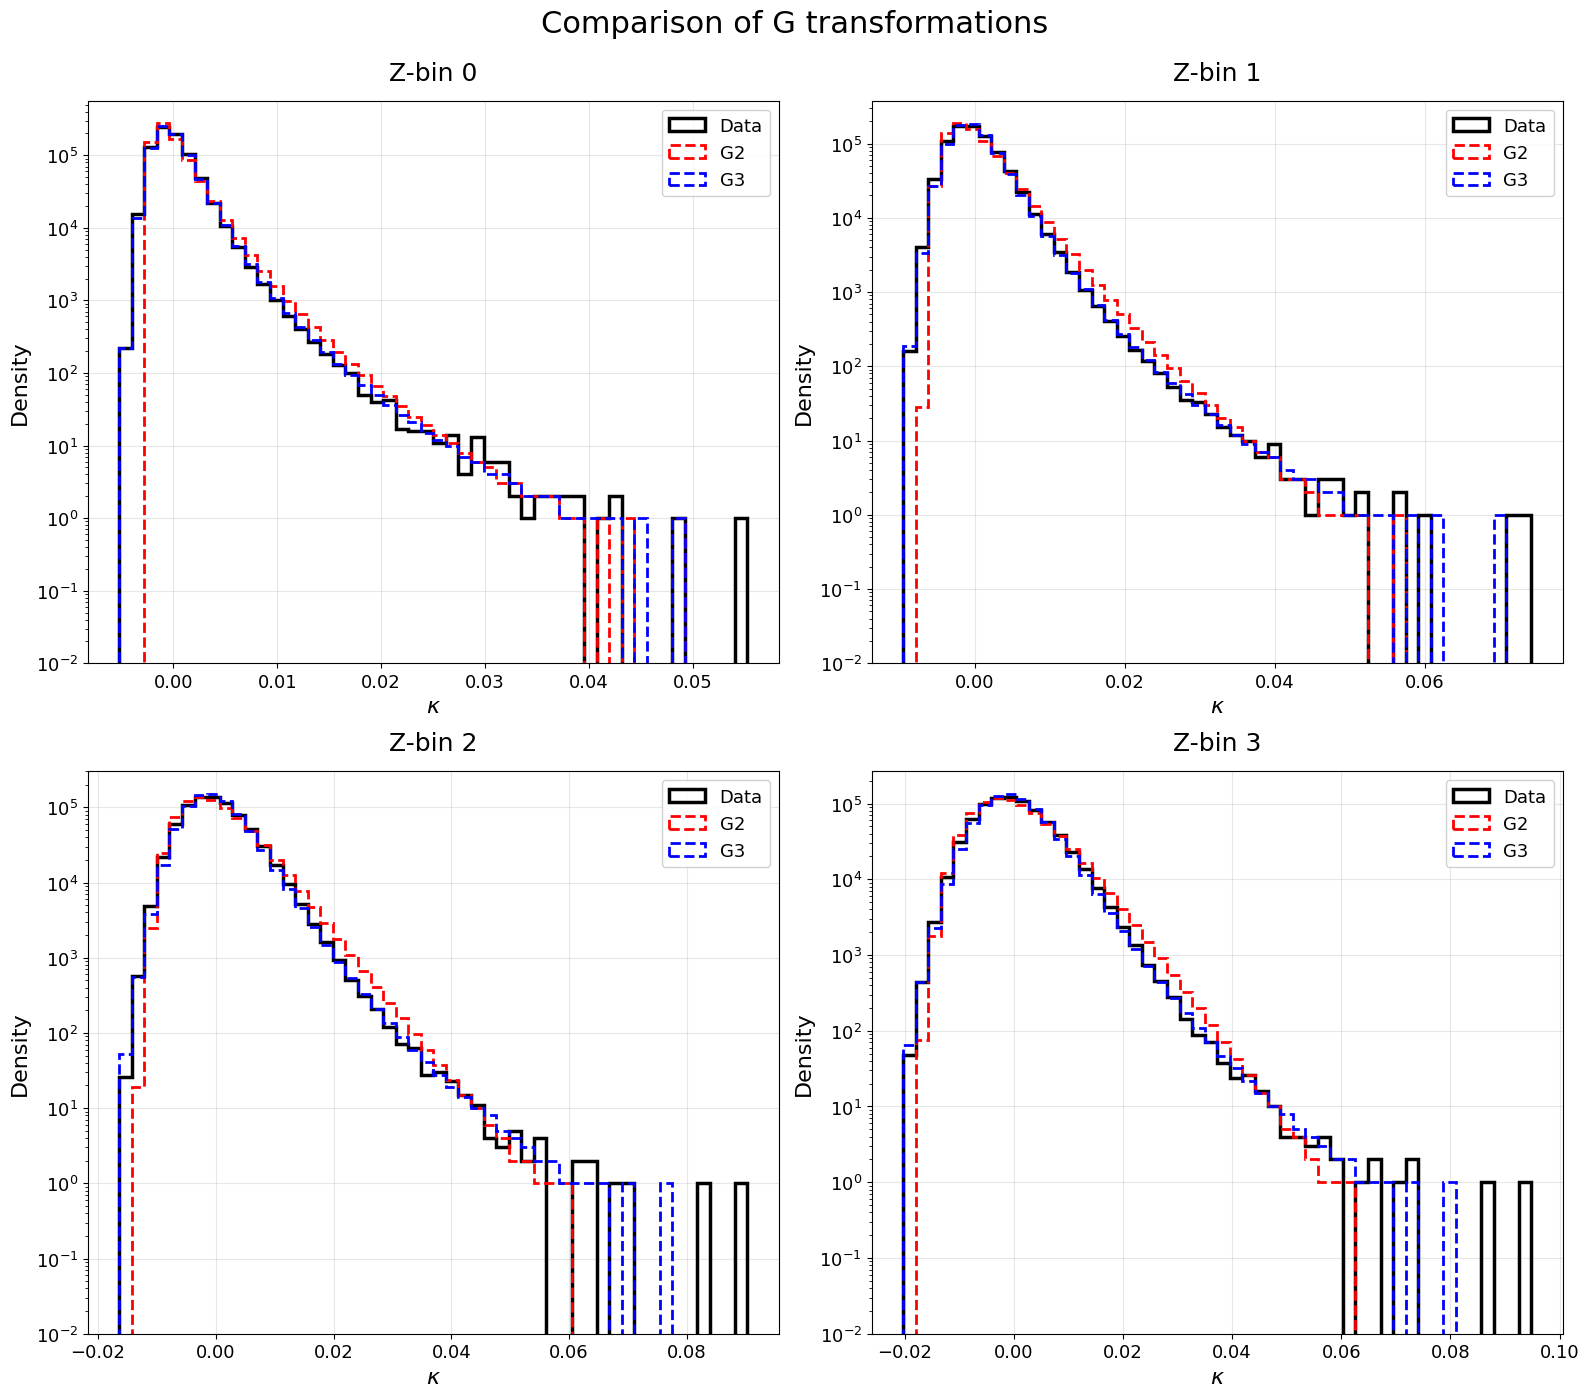

In [8]:
n_zbins = 4
#N_values = ['2', '3', '4', '5']
N_values = ['2', '3']
fig, axes = plt.subplots(2, 2, figsize=(16, 14))
axes = axes.flatten()

colors = ['red', 'blue', 'green', 'purple']
linestyles = ['dashed', 'dashed', 'dashed', 'dashed']

for Zbin in range(n_zbins):
    unit_var_samps, x, y = histogramer2d(kappa_map[Zbin], 1000, (-10, 4.5))
    
    ax = axes[Zbin]
    
    # Plot data histogram
    counts, bins, _ = ax.hist(kappa_map[Zbin], bins=50, histtype='step',
                              linewidth=2.5, label='Data', color='black')
    
    max_count = np.max(counts[counts > 0])
    y_upper = max_count * 2
    
    # Loop over different N values
    for idx, N in enumerate(N_values):
        result = fit_gn_to_data(x, y, N)
        fitted_params = result.x
        print(f"Zbin {Zbin}, G{N}: {fitted_params}")
        
        bf_samps = Gn(unit_var_samps, N, fitted_params)
        
        # Plot fit histogram
        ax.hist(bf_samps, bins=bins, histtype='step',
                linewidth=2, label=f'G{N}', color=colors[idx],
                linestyle=linestyles[idx])
        
        # Update y_upper
        counts_fit, _ = np.histogram(bf_samps, bins=bins)
        if len(counts_fit[counts_fit > 0]) > 0:
            max_fit = np.max(counts_fit[counts_fit > 0])
            y_upper = max(y_upper, max_fit * 2)
    
    # Format
    ax.set_yscale('log')
    ax.set_ylim(1e-2, y_upper)
    ax.set_xlabel(r'$\kappa$', fontsize=16)
    ax.set_ylabel('Density', fontsize=16)
    ax.set_title(f'Z-bin {Zbin}', fontsize=18, pad=15)
    ax.legend(fontsize=13, loc='upper right', framealpha=0.9)
    ax.grid(alpha=0.3)
    ax.tick_params(labelsize=13)

fig.suptitle('Comparison of G transformations', fontsize=22, y=0.995)
plt.tight_layout()
plt.show()

Smart initialization for G2: [0.1        0.00463274]
Zbin 0, G2: [0.65791385 0.0028792 ]
Smart initialization for G3: [ 0.1         0.00080735 -0.00012855]
Zbin 0, G3: [9.05314439e-01 7.49930067e-01 8.89553615e+02]
Smart initialization for G4: [0.07       0.13       1.         0.22041263]


/home/ivanespinoza/Extended-Lognormal/fitter/fitter.py:152: RuntimeWarning: divide by zero encountered in scalar divide
  return 1/np.mean(arg)
/home/ivanespinoza/Extended-Lognormal/fitter/fitter.py:176: RuntimeWarning: invalid value encountered in multiply
  return norm * arg - 1
/home/ivanespinoza/Extended-Lognormal/fitter/fitter.py:152: RuntimeWarning: divide by zero encountered in scalar divide
  return 1/np.mean(arg)
/home/ivanespinoza/Extended-Lognormal/fitter/fitter.py:176: RuntimeWarning: invalid value encountered in multiply
  return norm * arg - 1


Zbin 0, G4: [ 6.32581071e-02  9.57093849e-04 -1.08566915e+00  4.48031077e+00]
Smart initialization for G5: [7.00000000e-02 1.30000000e-01 8.07346741e-04 1.00000000e+00
 2.20412631e-01]
Zbin 0, G5: [ 0.11570438  0.19606634 -0.17515003 -0.66365609  1.86168282]
Smart initialization for G2: [0.1        0.00650821]
Zbin 1, G2: [0.49005386 0.00711056]
Smart initialization for G3: [ 0.1         0.00150144 -0.00017185]
Zbin 1, G3: [  0.87240953   1.22248751 662.21535495]
Smart initialization for G4: [0.07       0.13       1.         0.15615285]
Zbin 1, G4: [ 5.52093397e+00  1.84301916e-03 -8.61131420e-01  1.01145699e+01]
Smart initialization for G5: [0.07       0.13       0.00150144 1.         0.15615285]
Zbin 1, G5: [ 0.12362117  0.21088784 -0.18899123 -0.73173638  1.91107583]
Smart initialization for G2: [0.1        0.00841194]
Zbin 2, G2: [0.34782248 0.01574801]
Smart initialization for G3: [ 0.1         0.00240827 -0.00019952]
Zbin 2, G3: [  0.82200938   1.75456366 534.46382875]
Smart init

/home/ivanespinoza/Extended-Lognormal/fitter/fitter.py:152: RuntimeWarning: divide by zero encountered in scalar divide
  return 1/np.mean(arg)
/home/ivanespinoza/Extended-Lognormal/fitter/fitter.py:176: RuntimeWarning: invalid value encountered in multiply
  return norm * arg - 1


Zbin 3, G4: [ 1.68685174e+01  4.38453314e-03 -8.09296013e-01  1.19651632e+01]
Smart initialization for G5: [0.07       0.13       0.00296557 1.         0.10107303]
Zbin 3, G5: [ 0.11565438  0.829158   -0.27491105  0.10316981 11.49814696]


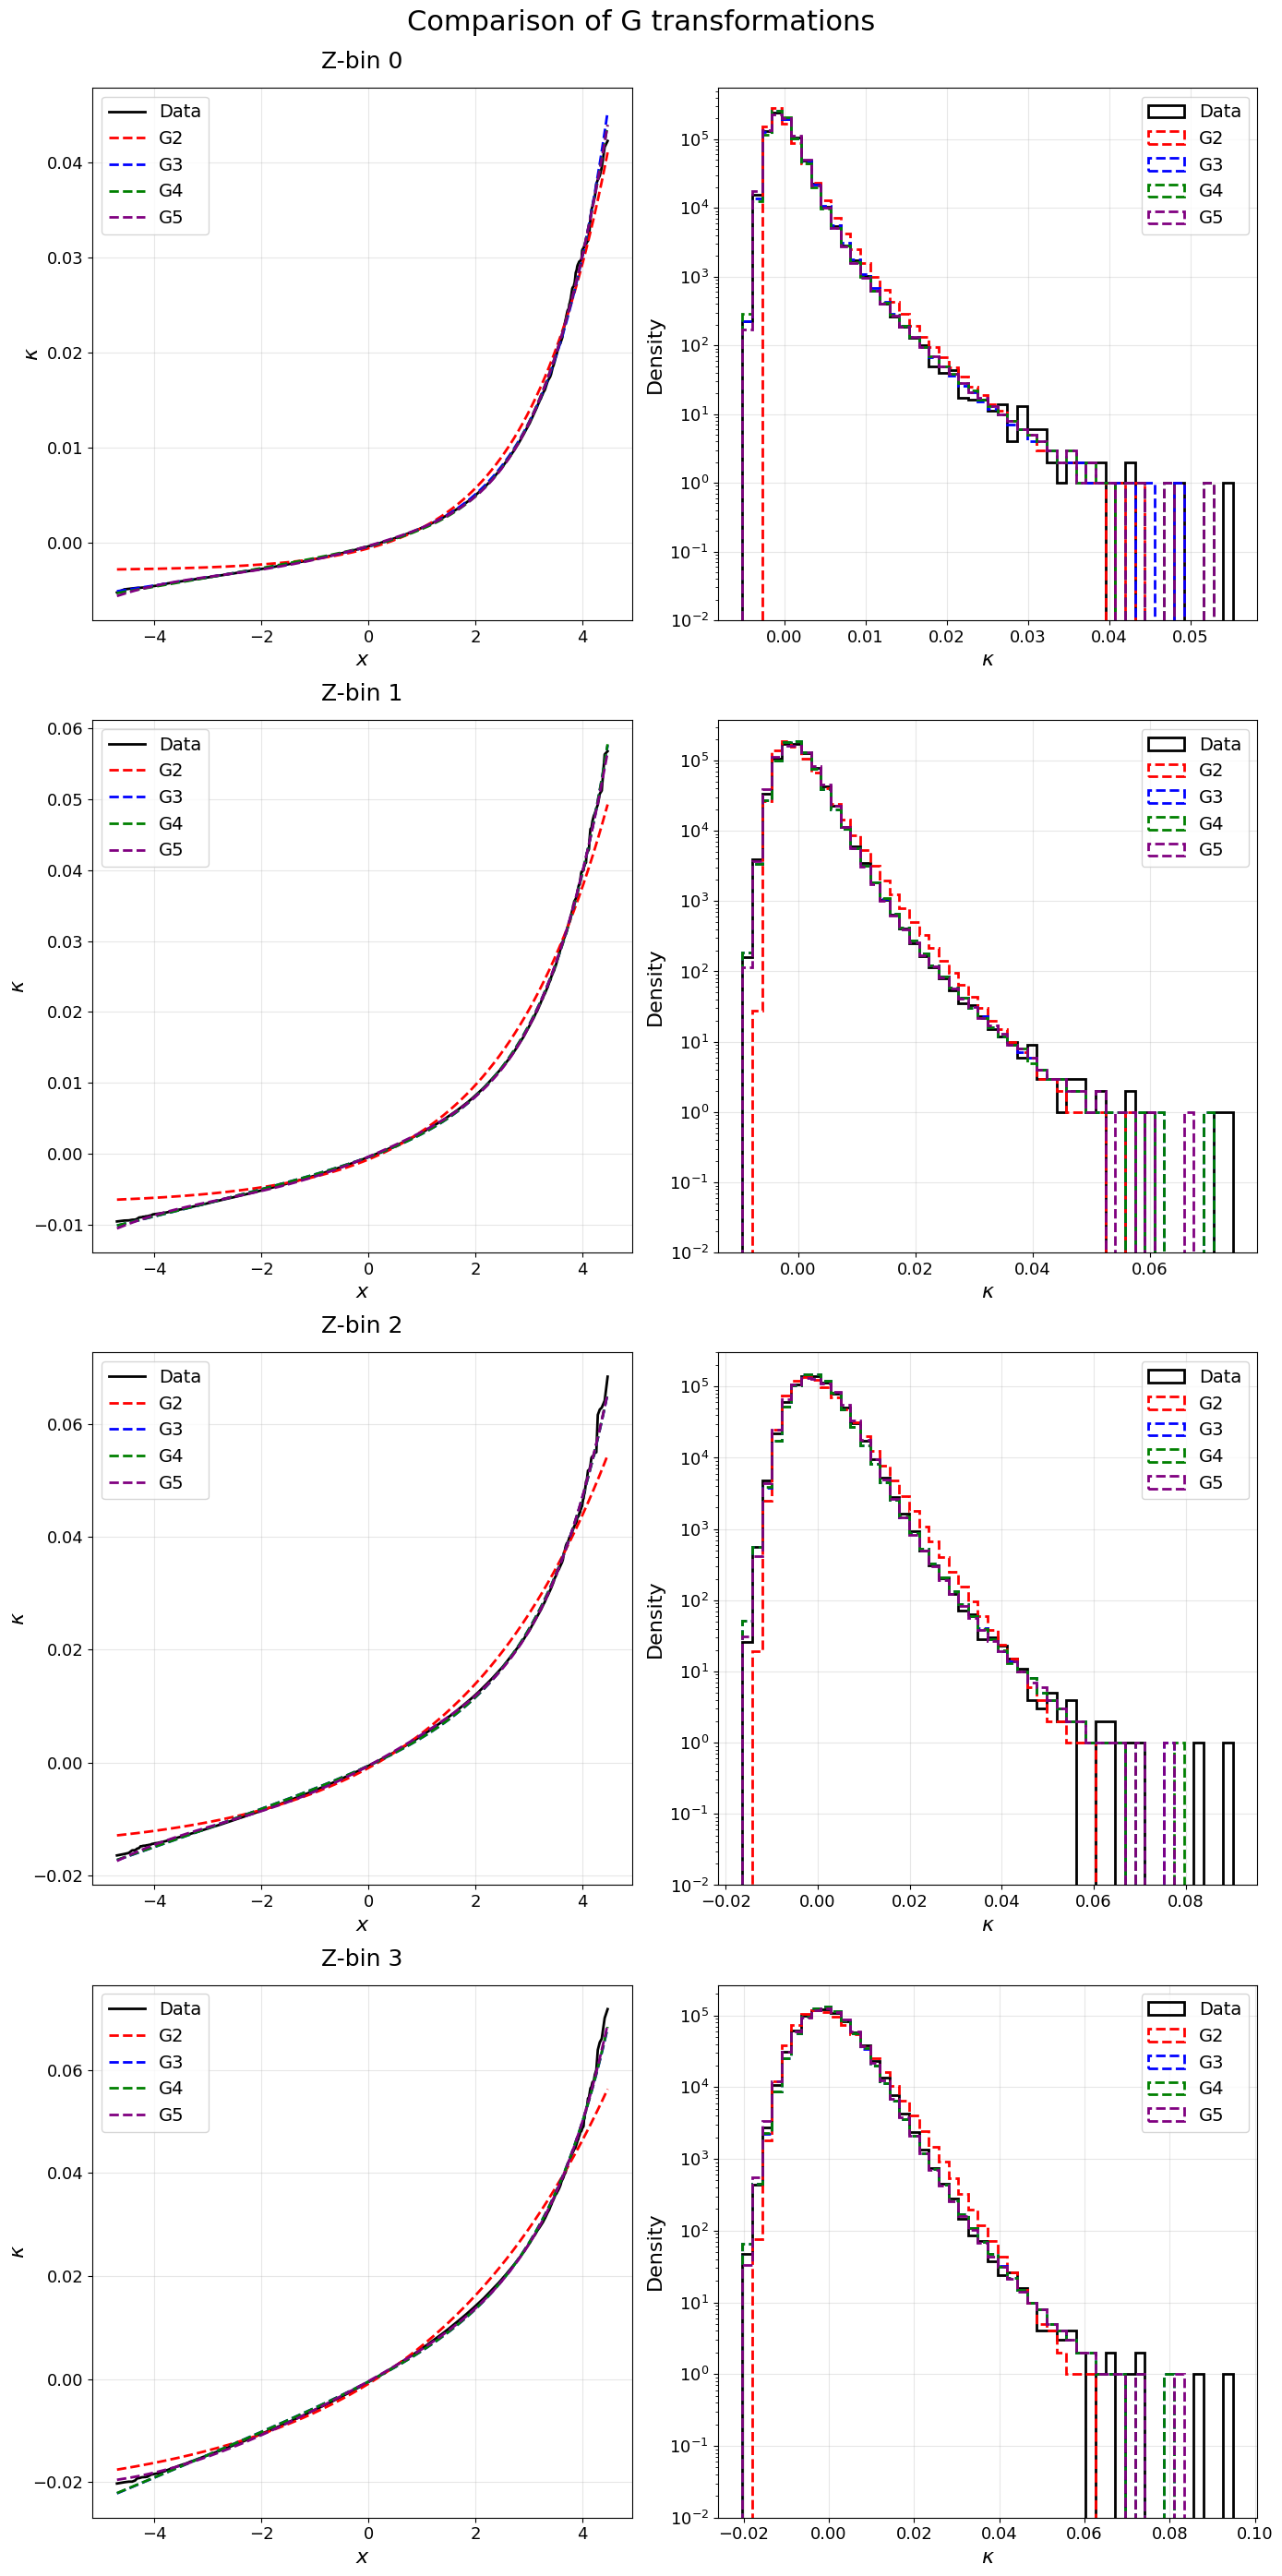

In [5]:
n_zbins = 4
N_values = ['2', '3', '4', '5']

fig, axes = plt.subplots(n_zbins, 2, figsize=(14, 7*n_zbins))

colors = ['red', 'blue', 'green', 'purple']
linestyles = ['dashed', 'dashed', 'dashed', 'dashed']

for Zbin in range(n_zbins):
    unit_var_samps, x, y = histogramer2d(kappa_map[Zbin], 1000, (-10, 4.5))
   
    ax1 = axes[Zbin, 0]
    ax2 = axes[Zbin, 1]
   
    # Plot data once
    ax1.plot(x, y, color='black', linestyle='solid', label='Data', linewidth=2)
   
    # Right panel: Plot histogram once
    counts, bins, _ = ax2.hist(kappa_map[Zbin], bins=50, histtype='step',
                                linewidth=2, label='Data', color='black')
   
    max_count = np.max(counts[counts > 0])
    y_upper = max_count * 2
   
    # Loop over different N values
    for idx, N in enumerate(N_values):
        result = fit_gn_to_data(x, y, N)
        fitted_params = result.x
        print(f"Zbin {Zbin}, G{N}: {fitted_params}")
       
        y_bf = Gn(x, N, fitted_params)
        bf_samps = Gn(unit_var_samps, N, fitted_params)
       
        # Left panel: transformation curve
        ax1.plot(x, y_bf, color=colors[idx], linestyle=linestyles[idx],
                 label=f'G{N}', linewidth=2)
       
        # Right panel: PDF
        ax2.hist(bf_samps, bins=bins, histtype='step',
                 linewidth=2, label=f'G{N}', color=colors[idx],
                 linestyle=linestyles[idx])
       
        # Update y_upper if needed
        counts_fit, _ = np.histogram(bf_samps, bins=bins)
        if len(counts_fit[counts_fit > 0]) > 0:
            max_fit = np.max(counts_fit[counts_fit > 0])
            y_upper = max(y_upper, max_fit * 2)
   
    # Format left panel
    ax1.legend(fontsize=14, loc='upper left')
    ax1.set_xlabel(r'$x$', fontsize=16)
    ax1.set_ylabel(r'$\kappa$', fontsize=16)
    ax1.set_title(f'Z-bin {Zbin}', fontsize=18, pad=15)
    ax1.grid(alpha=0.3)
    ax1.tick_params(labelsize=13)
   
    # Format right panel
    ax2.set_yscale('log')
    ax2.set_ylim(1e-2, y_upper)
    ax2.set_xlabel(r'$\kappa$', fontsize=16)
    ax2.set_ylabel('Density', fontsize=16)
    ax2.legend(fontsize=14, loc='upper right')
    ax2.grid(alpha=0.3)
    ax2.tick_params(labelsize=13)

fig.suptitle('Comparison of G transformations', fontsize=22, y=0.995)
plt.tight_layout()
plt.show()